## ML GROUP PROJECT 2025

- Ksenia
- Anh
- Shuya
- Vivi

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# loading dataset
data_dictionary = "ML project 2025/heloc_data_dictionary-2.xlsx"

df = pd.read_csv('heloc_dataset_v1.csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [6]:
# check the missing values
n_cols_with_missing_values = df.isnull().any(axis=0).sum()

n_rows_with_missing_ExternalRiskEstimate_values = df['ExternalRiskEstimate'].isnull().sum()

print(n_cols_with_missing_values)
print(n_rows_with_missing_ExternalRiskEstimate_values)

0
0


In [8]:
col_names = df.columns.tolist()

cols_numeric = [cols for cols in col_names if df[cols].dtype in ['int64', 'float64']]
cols_string = [cols for cols in col_names if df[cols].dtype == 'object']

print(cols_numeric)
print(cols_string)

['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
['RiskPerformance']


In [10]:
df_missing_ExternalRiskEstimate = df[df['ExternalRiskEstimate'] == -9]
n_rows_with_missing_ExternalRiskEstimate = df_missing_ExternalRiskEstimate.shape[0]
n_rows_all_numeric_missing = (df_missing_ExternalRiskEstimate[cols_numeric] == -9).all(axis=1).sum()
df_without_missing_rows = df[~(df[cols_numeric] == -9).all(axis=1)].copy()

In [12]:
s_minus_7 = (df_without_missing_rows == -7).sum()
s_minus_8 = (df_without_missing_rows == -8).sum()
s_minus_9 = (df_without_missing_rows == -9).sum()

### Task 1: Formulating the problem

In [15]:
X = df.drop(columns=['RiskPerformance'])
Y = df['RiskPerformance']
Y = Y.map({'Good':0, 'Bad':1})

In [17]:
print(X.head())
print(Y)

   ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
0                    55                    144                          4   
1                    61                     58                         15   
2                    67                     66                          5   
3                    66                    169                          1   
4                    81                    333                         27   

   AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
0              84                     20                            3   
1              41                      2                            4   
2              24                      9                            0   
3              73                     28                            1   
4             132                     12                            0   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  MSinceMostRecentDelq  \
0                 

In [20]:
from sklearn.model_selection import train_test_split

X_train = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)[0]
X_test  = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)[1]
Y_train = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)[2]
Y_test  = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)[3]


In [21]:
print(X_train)

      ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
6682                    80                    136                         15   
4977                    91                    342                         42   
9991                    56                    193                         46   
984                     63                    250                         27   
797                     72                    255                         13   
...                    ...                    ...                        ...   
8991                    79                    135                          3   
75                      78                    134                          2   
7239                    84                    160                          4   
6531                    61                    137                          2   
1421                    -9                     -9                         -9   

      AverageMInFile  NumSatisfactoryTr

In [22]:
# check the shape

print('The shape of X_train:', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of Y_train:', Y_train.shape)
print('The shape of Y_test:', Y_test.shape)

The shape of X_train: (8367, 23)
The shape of X_test (2092, 23)
The shape of Y_train: (8367,)
The shape of Y_test: (2092,)


### Preprocessing

##### We are plotting the default risk. To aggregate the values in the dataframe by computing the average risk (average value of RiskPerformance per ExternalRiskEstimate)

In [28]:
df_train = pd.concat([X_train, Y_train], axis=1)

# calculate the mean
means = df_train.groupby('ExternalRiskEstimate')['RiskPerformance'].mean()
print(means.head())

ExternalRiskEstimate
-9     0.553498
 33    0.000000
 34    0.000000
 36    1.000000
 37    1.000000
Name: RiskPerformance, dtype: float64


In [30]:
counts = df_train.groupby('ExternalRiskEstimate').size()
print(counts.head())

ExternalRiskEstimate
-9     486
 33      1
 34      1
 36      2
 37      1
dtype: int64


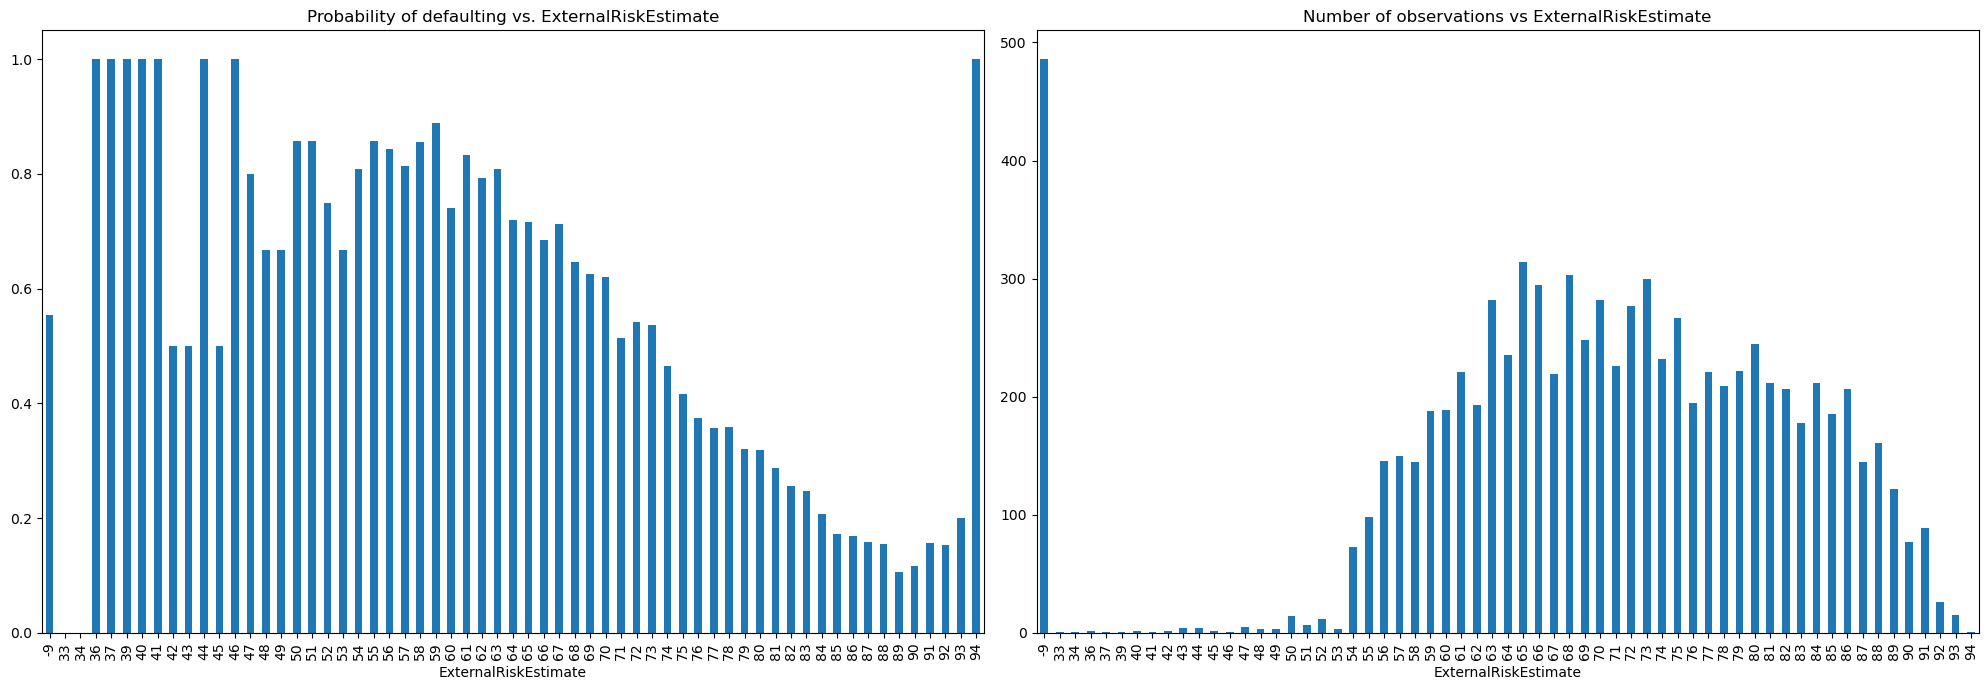

In [32]:
# plotting the default risk

fig, axes = plt.subplots(1,2, figsize=(20,7))
means.plot.bar(ax=axes[0], title= 'Probability of defaulting vs. ExternalRiskEstimate')
counts.plot.bar(ax=axes[1], title= 'Number of observations vs ExternalRiskEstimate')
plt.tight_layout()

#### We observe from the above:


### Preprocessing

#### This is the feature preprocessing stage

In [36]:
train_mask = ~X_train['ExternalRiskEstimate'].isin([-9, np.nan])
test_mask = ~X_test['ExternalRiskEstimate'].isin([-9, np.nan])
X_train = X_train[train_mask]
X_test  = X_test[test_mask]
Y_train = Y_train[train_mask]
Y_test  = Y_test[test_mask]

In [38]:
# check the shape

print('The shape of X_train:', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of Y_train:', Y_train.shape)
print('The shape of Y_test:', Y_test.shape)

The shape of X_train: (7881, 23)
The shape of X_test (1980, 23)
The shape of Y_train: (7881,)
The shape of Y_test: (1980,)


In [40]:
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,187,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3709,137,0
MaxDelq2PublicRecLast12M,0,0,0


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

In [44]:
minus_7_indicator = MissingIndicator(missing_values = -7, features= 'missing-only').fit(X_train)
minus_8_indicator = MissingIndicator(missing_values = -8, features= 'missing-only').fit(X_train)

do_nothing = ColumnTransformer([('Imputer -7 to mean', SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

impute_mean = SimpleImputer(strategy='mean')
feature = FeatureUnion([
    ('original_features', Pipeline([('impute', impute_mean)])),
    ('add features for -7', MissingIndicator(missing_values=-7, features='missing-only')),
    ('add features for -8', MissingIndicator(missing_values=-8, features='missing-only'))
])

pipeline = Pipeline([('expand features', feature),
                     ('replace -7 with -8', SimpleImputer(missing_values=-7, strategy= 'constant', fill_value=-8)),
                     ('replace -8 with mean', SimpleImputer(missing_values=-8, strategy= 'mean'))
                     ])

arr_X_train_t = pipeline.fit_transform(X_train)

print(arr_X_train_t)

[[ 80. 136.  15. ...   0.   0.   0.]
 [ 91. 342.  42. ...   0.   0.   0.]
 [ 56. 193.  46. ...   0.   0.   0.]
 ...
 [ 78. 134.   2. ...   0.   0.   0.]
 [ 84. 160.   4. ...   0.   0.   0.]
 [ 61. 137.   2. ...   0.   0.   0.]]


Noted after this part: our transformation didn't change the number of rows (observations), but only the number of features

In [47]:
# this is to set the variable column_names to hold the list of column names of the transformed dataset

minus_7_names = X_train.columns.values[minus_7_indicator.features_].tolist()
minus_7_names = list(map(lambda s:str(s) + '=-7', minus_7_names))

minus_8_names = X_train.columns.values[minus_8_indicator.features_].tolist()
minus_8_names = list(map(lambda s:str(s) + '=-8', minus_8_names))

column_names = X_train.columns.values.tolist() + minus_7_names + minus_8_names

print(column_names)


['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance', 'MSinceMostRecentDelq=-7', 'MSinceMostRecentInqexcl7days=-7', 'MSinceOldestTradeOpen=-8', 'MSinceMostRecentDelq=-8', 'MSinceMostRecentInqexcl7days=-8', 'NetFractionRevolvingBurden=-8', 'NetFractionInstallBurden=-8', 'NumRevolvingTradesWBalance=-8', 'NumInstallTradesWBalance=-8', 'NumBank2NatlTradesWHighUtilization=-8', 'PercentTradesWBalance=-8']


In [49]:
X_train_transformed = pd.DataFrame(arr_X_train_t, columns=column_names)
print(X_train_transformed.describe())

       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           7881.000000            7881.000000                7881.000000   
mean              72.021063             200.913179                   9.513514   
std                9.882883              96.440768                  12.259787   
min               33.000000               2.000000                   0.000000   
25%               64.000000             137.000000                   3.000000   
50%               72.000000             188.000000                   6.000000   
75%               80.000000             256.000000                  12.000000   
max               94.000000             603.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     7881.000000            7881.000000                  7881.000000   
mean        78.849765              21.135008                     0.595863   
std         33.894608              11.2

After the transformed data, we recognize there are 34 features compared to the original data we had 23

Also, the missing values were transformed which the minimal value in each column is no longer is -7 or -8

We are doing the same to get the X_test

In [52]:
X_test_transformed = pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=column_names)
X_test_transformed

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,51.0,162.0,35.0,73.0,4.0,1.0,1.0,50.0,1.0000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79.0,364.0,35.0,111.0,22.0,0.0,0.0,100.0,21.7886,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.0,199.0,0.0,84.0,15.0,1.0,1.0,94.0,35.0000,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,79.0,275.0,0.0,91.0,13.0,0.0,0.0,86.0,6.0000,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,61.0,264.0,32.0,109.0,30.0,0.0,0.0,97.0,12.0000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,71.0,206.0,2.0,63.0,17.0,0.0,0.0,94.0,49.0000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1976,83.0,122.0,13.0,35.0,11.0,0.0,0.0,100.0,21.7886,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1977,69.0,361.0,8.0,96.0,26.0,1.0,0.0,89.0,1.0000,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,56.0,201.0,12.0,67.0,25.0,2.0,1.0,85.0,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model training and evaluation

After preprocessed the data, now we can start training 3 models: classification tree, logistic regression, and K-nearest neighbors.

We will use 2 methods for evaluation: validation set as simple cross validation and cross-validation

In [55]:
X_train_t_tr  = train_test_split(X_train_transformed, Y_train, test_size=0.25, random_state=42)[0]
X_train_t_val = train_test_split(X_train_transformed, Y_train, test_size=0.25, random_state=42)[1]
Y_train_t_tr  = train_test_split(X_train_transformed, Y_train, test_size=0.25, random_state=42)[2]
Y_train_t_val = train_test_split(X_train_transformed, Y_train, test_size=0.25, random_state=42)[3]


In [57]:
print('The shape of X:', X.shape)
print('The shape of X_test_transformed:', X_test_transformed.shape)
print('The shape of X_train_transformed:', X_train_transformed.shape)

The shape of X: (10459, 23)
The shape of X_test_transformed: (1980, 34)
The shape of X_train_transformed: (7881, 34)


In [59]:
# check the shape

print('The shape of X_train_t_tr:', X_train_t_tr.shape)
print('The shape of X_train_t_val', X_train_t_val.shape)
print('The shape of Y_train_t_tr:', Y_train_t_tr.shape)
print('The shape of Y_train_t_val:', Y_train_t_val.shape)

The shape of X_train_t_tr: (5910, 34)
The shape of X_train_t_val (1971, 34)
The shape of Y_train_t_tr: (5910,)
The shape of Y_train_t_val: (1971,)


Validation set approach: 

- We use 60% of the data to train models (X_train_t_tr, Y_train_t_tr)
- We use 20% of the data for model selection (X_train_t_val, Y_train_t_val)
- We use the remaining 20% for final evaluation (X_test_transformed, Y_test)

In [62]:
# checking the proportion of train: validation: test data

print('The proportion of train: validation: test data is %.1f:%.1f:%.1f'%(len(Y_train_t_tr)/len(Y), len(Y_train_t_val)/len(Y), len(Y_test)/len(Y)))

The proportion of train: validation: test data is 0.6:0.2:0.2


In [64]:
from sklearn import tree, linear_model, neighbors

clf_tree = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr)
clf_knn = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

In [65]:
from sklearn.metrics import accuracy_score

print('Decision tree accuracy: %3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))


Decision tree accuracy: 0.645865
Logistic regression accuracy: 0.742263
KNN accuracy: 0.678


Now, we are using cross-validation to evaluate models. 

- In this part, we run the cross validation on the entire training data X_train_transformed. The purpose is to assure that we evaluate model performance on data that wasn't used in its training

In [67]:
from sklearn.model_selection import cross_validate

cv_result_tree = cross_validate(tree.DecisionTreeClassifier(), X_train_transformed, Y_train, cv=5, return_estimator=True)
cv_result_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_transformed, Y_train, cv=5, return_estimator=True)
cv_result_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train_transformed, Y_train, cv=5, return_estimator=True)

In [68]:
cv_result_tree

{'fit_time': array([0.0899291 , 0.06111288, 0.04022217, 0.0448699 , 0.04627109]),
 'score_time': array([0.00346899, 0.00075006, 0.00057483, 0.00054383, 0.00179791]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.62206722, 0.62563452, 0.64340102, 0.64213198, 0.61865482])}

In [69]:
# These are 5 evaluations (because we run it 5 times)
cv_result_tree['test_score']

array([0.62206722, 0.62563452, 0.64340102, 0.64213198, 0.61865482])

In [70]:
# this the average value of each model
print('Classification tree - CV accuracy score is %.3f'%cv_result_tree['test_score'].mean())
print('Logistic regression - CV accuracy score %.3f'%cv_result_log_reg['test_score'].mean())
print('KKN - CV accuracy score %.3f'%cv_result_knn['test_score'].mean())

Classification tree - CV accuracy score is 0.630
Logistic regression - CV accuracy score 0.737
KKN - CV accuracy score 0.676


In this part, we perform hyper-parametewr tuning to try improve the performance. 

- Using the logistic regression model in this part

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth':[1,2,3,4,5],  
               'criterion':["gini", "entropy"],            
               'min_samples_split':[2,5,10],              
               'min_samples_leaf':[10,20,30]
}]

clf_tree = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf_tree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_transformed, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_leaf': [10, 20, 30],
                          'min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [73]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 5}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 10}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 2}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 5}
0.7123461489658673 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 10}
0.7123461489658673 {'criterion': 'gini', 'max_depth'

In [74]:
# the best hyper-parameters we found so far

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 2}

In [75]:
# variable holding the best classifier (fitted on the entire dataset)

grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)

- Now we are training a model on the train set to evaluate on the validation set

In [77]:
clf_tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=30).fit(X_train_t_tr, Y_train_t_tr)

In [78]:
from sklearn.metrics import confusion_matrix

y_pred = clf_tree.predict(X_train_t_val)
conf_matrix = confusion_matrix(Y_train_t_val, y_pred)

print(conf_matrix)

[[630 309]
 [229 803]]


In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

tn, fp, fn, tp = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]

accuracy = (tn + tp)/ (tn + tp + fn + fp)

tpr = tp/ (tp + fn)
fpr = fp/ (fp + tn)
tnr = tn/ (tn + fp)
fnr = fn/ (fn + tp)

recall = recall_score(Y_train_t_val, clf_tree.predict(X_train_t_val))
precision = precision_score(Y_train_t_val, clf_tree.predict(X_train_t_val))

print('tn is %.3f'%tn)
print('fp is %.3f'%fp)
print('fn is %.3f'%fn)
print('tp is %.3f'%tp)
print('tpr is %.3f'%tpr)
print('fpr is %f'%fpr)
print('tnr is %f'%tnr)
print('fnr is %f'%fnr)
print('Recall is %.3f'%recall)
print('Precision is %f'%precision)
print('Accuracy is %f'%accuracy)

tn is 630.000
fp is 309.000
fn is 229.000
tp is 803.000
tpr is 0.778
fpr is 0.329073
tnr is 0.670927
fnr is 0.221899
Recall is 0.778
Precision is 0.722122
Accuracy is 0.727042


As the score we computed, we have:
- Our prediction are correct 72.7042% of the times.
- The model also catches 77.8% of the defaulting customers.
- The model is correct 72.2122% of the times it predicts 'Bad.'

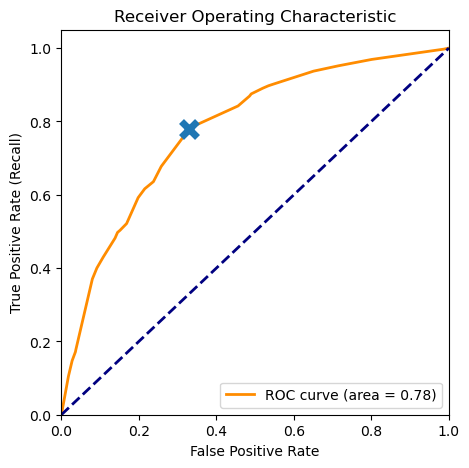

In [83]:
# Plotting the ROC curve for this model

from sklearn import metrics

scores = clf_tree.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(5,5))
lw = 2

idx = (np.abs(thresholds - 0.5)).argmin()
selected_fpr, selected_tpr = fpr[idx], tpr[idx]

plt.plot(fpr, tpr, color='darkorange', lw=lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0,1], [0,1], color= 'navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right');

plt.plot(selected_fpr, selected_tpr, marker='x', markeredgewidth=5, markersize=12);


- ROC curve shows a series of models that differ by certain threshold value (on the probability for predicting 1 vs 0)
- 'X' marks the trained model clf_tree

### Using Tree-based models

In [86]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [87]:
# Using the decision stumps (max_depth=1)

clf_tree_1 = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [88]:
train_accuracy_dt = clf_tree_1.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_dt = clf_tree_1.score(X_train_t_val, Y_train_t_val)

print('Train accuracy (DT): %.3f'%train_accuracy_dt)
print('Validation accuracy (DT): %.3f'%val_accuracy_dt)

Train accuracy (DT): 0.710
Validation accuracy (DT): 0.720


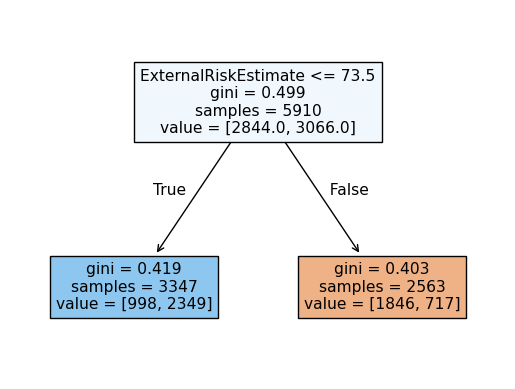

In [89]:
# Visualize the tree

tree.plot_tree(clf_tree_1, feature_names=column_names, filled=True)
plt.savefig('tree_stump.png', dpi=300)

   Train accuracy  Validation accuracy
1        0.709814             0.719939
2        0.709814             0.719939
3        0.712352             0.704211
4        0.725212             0.724505
5        0.735533             0.720954
Axes(0.125,0.11;0.775x0.77)


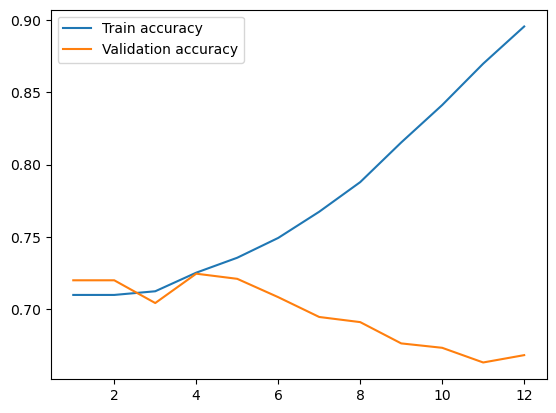

In [90]:
# changing the depth of tree

accuracy_tr = {'Train accuracy':[], 'Validation accuracy':[]}

for depth in range (1,13):
    clf_tr = DecisionTreeClassifier(max_depth= depth, random_state=0)
    clf_tr.fit(X_train_t_tr, Y_train_t_tr)

    acc_train = clf_tr.score(X_train_t_tr, Y_train_t_tr)
    acc_val = clf_tr.score(X_train_t_val, Y_train_t_val)

    accuracy_tr['Train accuracy'].append(acc_train)
    accuracy_tr['Validation accuracy'].append(acc_val)

tree_accuracy = pd.DataFrame(accuracy_tr, index= range(1,13))

print(tree_accuracy.head())
print(tree_accuracy.plot())

Based on this plotting of the train and validation accuracies as the tree depth, we can conclude that there is no improvement of the validation accuracy (shown in the deterioration at some point) in the meanwhile the train accuracy keep improving. ==> This is an indication of overfitting.

- Now, we are trying to tune the hyperparameters of the model to improve its performance.

In [92]:
param_grid_1 = [{'max_depth': range(1,13),
                 'min_samples_leaf': [10,20,100],
                 'max_leaf_nodes': [2,4,6,20,100,10000]}]

grid_search_1 = GridSearchCV(DecisionTreeClassifier(random_state=0),
                             param_grid_1,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                             scoring='accuracy')

grid_search_1.fit(X_train_t_tr, Y_train_t_tr)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 13),
                          'max_leaf_nodes': [2, 4, 6, 20, 100, 10000],
                          'min_samples_leaf': [10, 20, 100]}],
             scoring='accuracy')

In [93]:
# Creating the datafram based on the results of the grid search above

grid_search_1_res = grid_search_1.cv_results_

tree_accuracy_grid = pd.DataFrame({
    'max_depth': grid_search_1_res['param_max_depth'].data,
    'max_leaf_nodes': grid_search_1_res['param_max_leaf_nodes'].data,
    'min_samples_leaf': grid_search_1_res['param_min_samples_leaf'].data,
    'Accuracy': grid_search_1_res['mean_test_score']
})

print(tree_accuracy_grid.head())

   max_depth  max_leaf_nodes  min_samples_leaf  Accuracy
0          1               2                10  0.705922
1          1               2                20  0.705922
2          1               2               100  0.705922
3          1               4                10  0.705922
4          1               4                20  0.705922


/var/folders/tz/_9j86hks55l8t18gtcckr11m0000gn/T/ipykernel_2327/85252894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='max_depth', y='Accuracy', data=tree_accuracy_grid, ax=axes[0], palette='coolwarm');


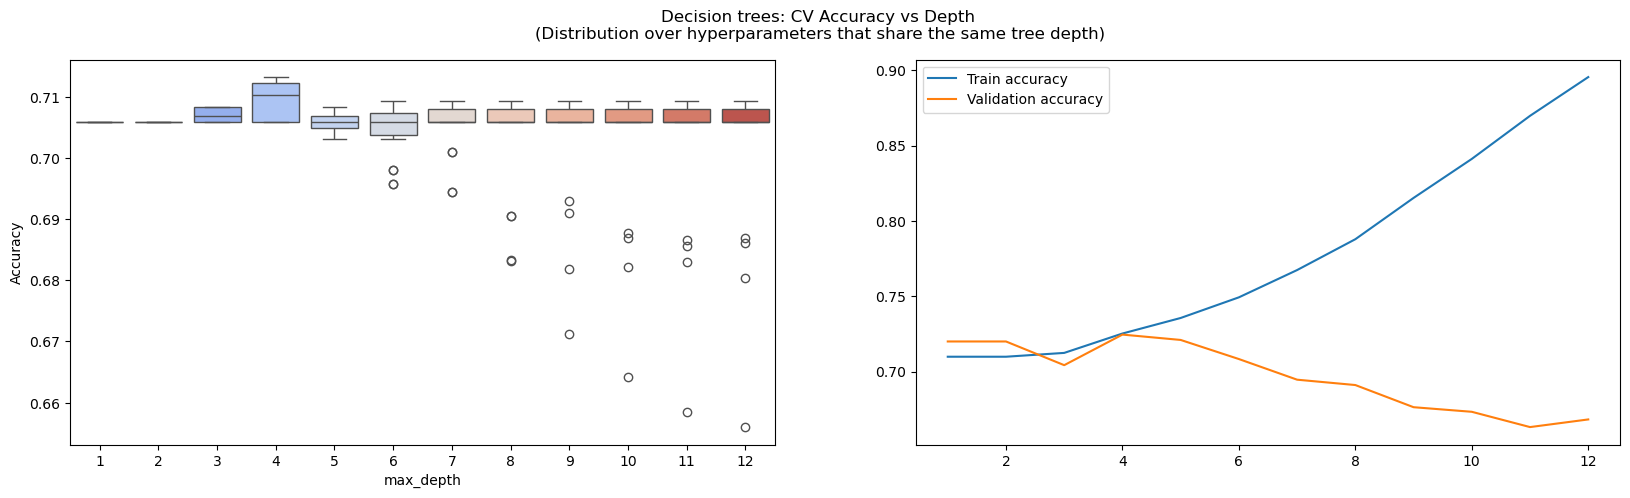

In [94]:
import seaborn as sns 

fig, axes = plt.subplots(1,2, figsize=(20,5))
plt.suptitle('Decision trees: CV Accuracy vs Depth \n(Distribution over hyperparameters that share the same tree depth)')
sns.boxplot(x='max_depth', y='Accuracy', data=tree_accuracy_grid, ax=axes[0], palette='coolwarm');
tree_accuracy.plot(ax=axes[1]);

The figure above shows the cross validation accuracy as a function of the maximal depth. The right tuning can miltigate overfitting.

### Using Ensemble methods - Random forests model

In [97]:
rf = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)
rf

RandomForestClassifier(max_depth=1, random_state=0)

In [98]:
train_accuracy_rf = rf.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_rf = rf.score(X_train_t_val, Y_train_t_val)

print('Train accuracy RF: %.3f'%train_accuracy_rf)
print('Validation accuracy RF: %.3f'%val_accuracy_rf)

Train accuracy RF: 0.715
Validation accuracy RF: 0.721


In [99]:
param_grid_2 = [{'n_estimators':[10,20,50],
                 'max_depth': range(1,8),
                 'min_samples_leaf': [10,20,100],
                 'max_leaf_nodes': [2,4,8,16]}]

grid_search_2 = GridSearchCV(RandomForestClassifier(random_state=0),
                             param_grid_2,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                             scoring='accuracy')

grid_search_2.fit(X_train_t_tr, Y_train_t_tr)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 8),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

In [100]:
rf_accuracy_grid = pd.DataFrame(grid_search_2.cv_results_)
rf_accuracy_grid = rf_accuracy_grid[['param_n_estimators', 'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'mean_test_score']]
rf_accuracy_grid.columns = ['n_estimators', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf', 'Accuracy']

rf_accuracy_grid['n_estimators'] = rf_accuracy_grid['n_estimators'].astype(int)
rf_accuracy_grid['max_depth'] = rf_accuracy_grid['max_depth'].astype(int)
rf_accuracy_grid['max_leaf_nodes'] = rf_accuracy_grid['max_leaf_nodes'].astype(int)
rf_accuracy_grid['min_samples_leaf'] = rf_accuracy_grid['min_samples_leaf'].astype(int)

rf_accuracy_grid = rf_accuracy_grid.reset_index(drop=True)

print(rf_accuracy_grid.head())

   n_estimators  max_depth  max_leaf_nodes  min_samples_leaf  Accuracy
0            10          1               2                10  0.687479
1            20          1               2                10  0.712860
2            50          1               2                10  0.712352
3            10          1               2                20  0.687479
4            20          1               2                20  0.712860


/var/folders/tz/_9j86hks55l8t18gtcckr11m0000gn/T/ipykernel_2327/2955787148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='max_depth', y='Accuracy', data=tree_accuracy_grid, ax=axes[0], palette='husl');
/var/folders/tz/_9j86hks55l8t18gtcckr11m0000gn/T/ipykernel_2327/2955787148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='max_depth', y='Accuracy', data=rf_accuracy_grid,ax=axes[1], palette='Set2');


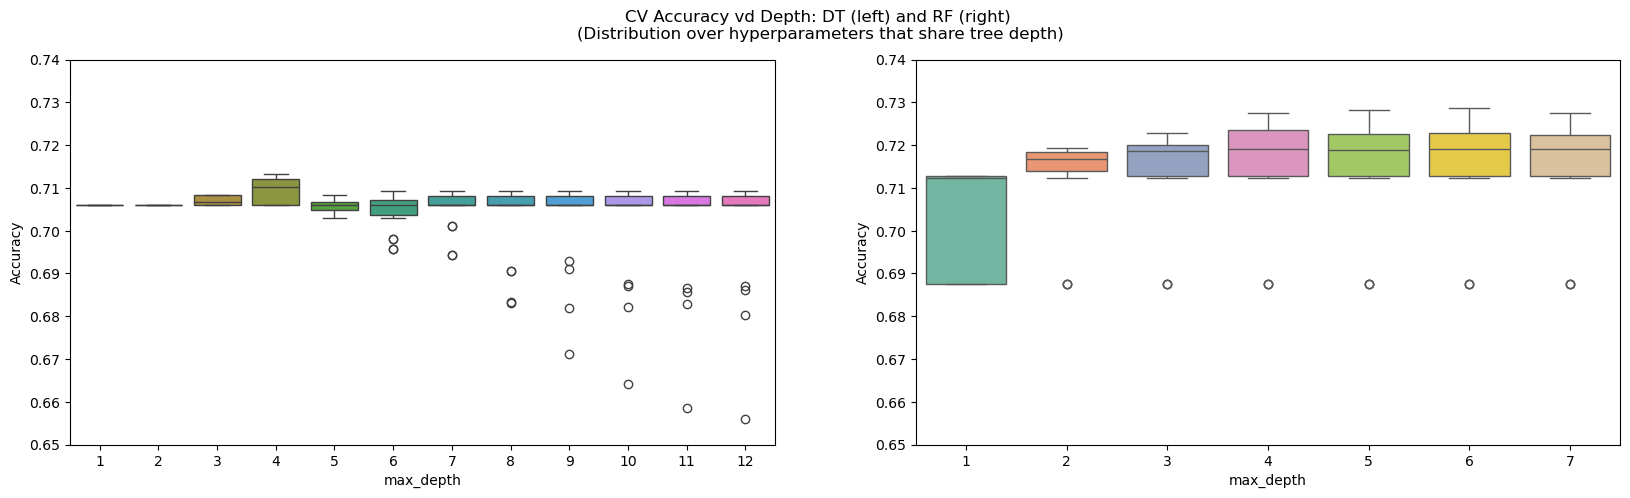

In [101]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plt.suptitle('CV Accuracy vd Depth: DT (left) and RF (right) \n(Distribution over hyperparameters that share tree depth)')
sns.boxplot(x='max_depth', y='Accuracy', data=tree_accuracy_grid, ax=axes[0], palette='husl');
sns.boxplot(x='max_depth', y='Accuracy', data=rf_accuracy_grid,ax=axes[1], palette='Set2');
axes[0].set_ylim(0.65,0.74);axes[1].set_ylim(0.65,0.74);


In [102]:
# the best configuration
grid_search_2.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 20,
 'n_estimators': 50}

In [103]:
# the best model training using the best configuration on all folds

best_RF_model = grid_search_2.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=20,
                       n_estimators=50, random_state=0)

Now, we are computing the train and validation accuracies of the optimized Random Forest best model.

In [105]:
train_RF_opt = best_RF_model.score(X_train_t_tr, Y_train_t_tr)
val_RF_opt = best_RF_model.score(X_train_t_val, Y_train_t_val)

print('Train accuracy (RF optimized): %.3f'%train_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_RF_opt)


Train accuracy (RF optimized): 0.738
Validation accuracy (RF optimized): 0.726


An issues when working with ensemble models: 
- Our model has averages 50 trees (n_estimators=50 in the best configuration)
- Each of depth is at most 6 (with up to $2^6 = 64$ leaf nodes)

==> The approach: compute the feature importance (by computing overall improvement in the model which can be contributed to splitting using each feature)

<Axes: title={'center': 'Feature Importance of the best RF model'}>

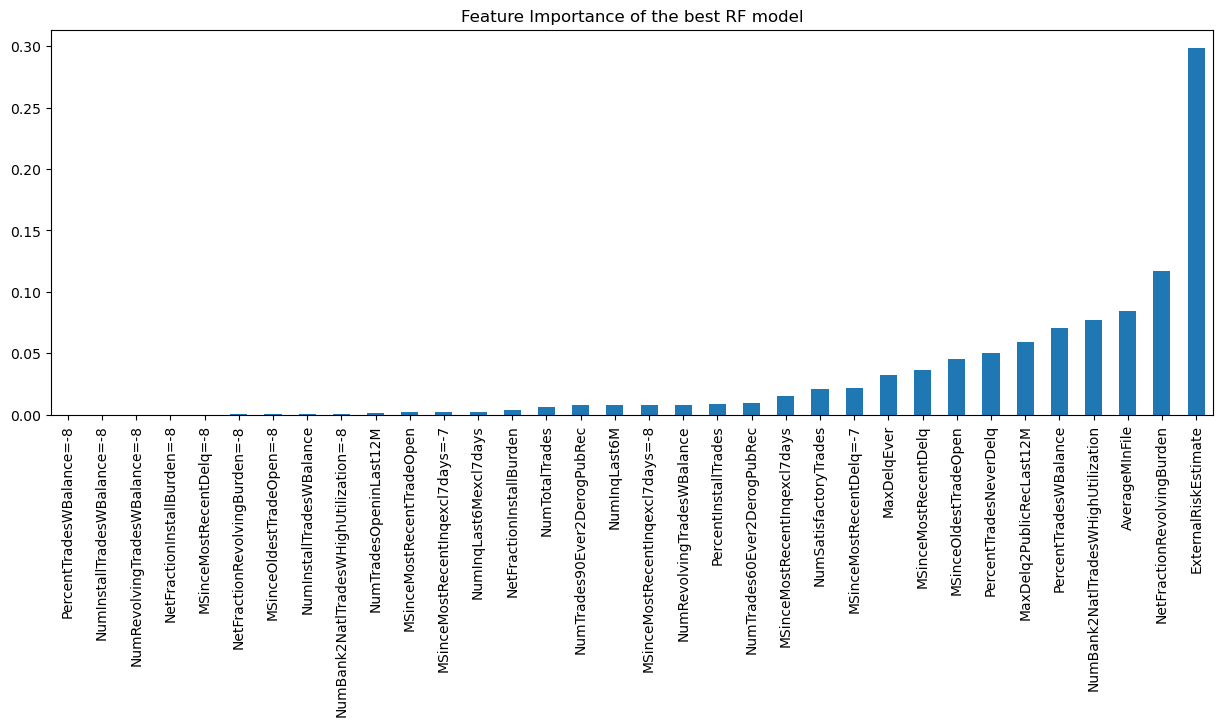

In [107]:
# Plotting the feature importance
pd.Series(data=grid_search_2.best_estimator_.feature_importances_, index=column_names).sort_values().plot.bar(figsize=(15,5), title='Feature Importance of the best RF model')

As the graph above, we are seeing that RF model is heavily relying on the feature of ExternalRiskEstimate, but it is also ultilizing other features now.

- Now, we are checking how the CV accuracy is affected by the number of trees in the ensemble by replacing the ensemble size.

In [109]:
n_range = range(10, 200, 10)

rf_result = {'Train accuracy':[], 'Validation accuracy':[]}

for num in n_range:
    rf = RandomForestClassifier(n_estimators=num, random_state=0, max_depth=1)
    rf.fit(X_train_t_tr, Y_train_t_tr)

    train_acc = rf.score(X_train_t_tr, Y_train_t_tr)
    val_acc = rf.score(X_train_t_val, Y_train_t_val)

    rf_result['Train accuracy'].append(train_acc)
    rf_result['Validation accuracy'].append(val_acc)

rf_accuracy_1 = pd.DataFrame(rf_result, index=n_range)

print(rf_accuracy_1.head())

    Train accuracy  Validation accuracy
10        0.694416             0.701167
20        0.716074             0.718924
30        0.712860             0.711821
40        0.711675             0.711314
50        0.712521             0.713851


<Axes: >

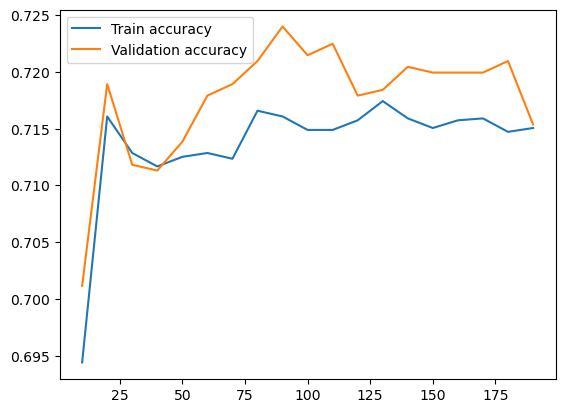

In [110]:
# Plotting the rf_result
rf_accuracy_1.plot()

As the graph above is given, we observe that the performance of the ensemble tends to improve and stablize as the ensembe grows.

### Using Ensemble method - Boosting model

In [113]:
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_t_tr, Y_train_t_tr)
clf_boosting

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=0)

In [114]:
train_boosting_acc = clf_boosting.score(X_train_t_tr, Y_train_t_tr)
val_boosting_acc = clf_boosting.score(X_train_t_val, Y_train_t_val)

In [115]:
print('Train accuracy (boosting): %.3f'%train_boosting_acc)
print('Validation accuracy (boosting): %.3f'%val_boosting_acc)
print('\nTrain accuracy (RF optimized): %.3f'%train_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_RF_opt)
print('\nTrain accuracy (DT): %.3f'%train_accuracy_dt)
print('Validation accuracy (DT): %.3f'%val_accuracy_dt)

Train accuracy (boosting): 0.741
Validation accuracy (boosting): 0.745

Train accuracy (RF optimized): 0.738
Validation accuracy (RF optimized): 0.726

Train accuracy (DT): 0.710
Validation accuracy (DT): 0.720


Now, we are testing the effect of the learning rate with higher learning rate and a larger ensemble because the smaller the learning rate, the more iterations we may need to reach the optimal ensemble.

In [118]:
import warnings
warnings.filterwarnings("ignore")

size_range = range(10, 400, 10)

acc_boosting_res = {'Train accuracy':[], 'Validation accuracy':[]}

for n in size_range:
    ada_boost = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=1)
    ada_boost.fit(X_train_t_tr, Y_train_t_tr)

    train_acc_1 = ada_boost.score(X_train_t_tr, Y_train_t_tr)
    val_acc_1 = ada_boost.score(X_train_t_val, Y_train_t_val)

    acc_boosting_res['Train accuracy'].append(train_acc_1)
    acc_boosting_res['Validation accuracy'].append(val_acc_1)

boosting_accuracy = pd.DataFrame(acc_boosting_res, index=size_range)

print(boosting_accuracy.head())

    Train accuracy  Validation accuracy
10        0.725888             0.734145
20        0.737733             0.742263
30        0.737225             0.741755
40        0.737056             0.742770
50        0.740948             0.745307


<Axes: >

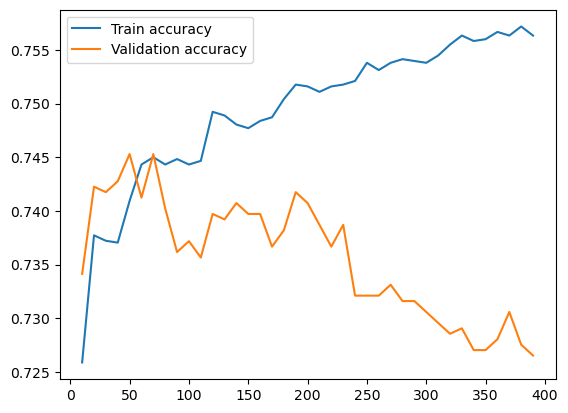

In [119]:
# plotting the Boosting

boosting_accuracy.plot()

The graph above shown that:
- Early Stage (0–50 iterations):
    + Both training and validation accuracy increase together.
    + The model is learning well, and adding more trees is improving generalization.

- Mid Stage (50–150 iterations)
    + Validation accuracy starts fluctuating, while train accuracy continues to rise.
    + This suggests the model is reaching its peak performance and may start overfitting soon.

- Late Stage (150+ iterations)
    + Training accuracy continues increasing (model is memorizing training data).
    + Validation accuracy declines, meaning the model is overfitting to training data and failing to generalize.


In [121]:
from sklearn.metrics import confusion_matrix

# Generate predictions for Random Forest
y_pred_rf = best_RF_model.predict(X_train_t_val)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, y_pred_rf).ravel()

# Compute FPR & FNR
fpr_rf = fp / (fp + tn)  # False Positive Rate
fnr_rf = fn / (fn + tp)  # False Negative Rate

print(f"Random Forest - FPR: {fpr_rf:.4f}, FNR: {fnr_rf:.4f}")


Random Forest - FPR: 0.3323, FNR: 0.2209


In [122]:
# Generate predictions for AdaBoost
y_pred_ada = ada_boost.predict(X_train_t_val)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, y_pred_ada).ravel()

# Compute FPR & FNR
fpr_ada = fp / (fp + tn)
fnr_ada = fn / (fn + tp)

print(f"AdaBoost - FPR: {fpr_ada:.4f}, FNR: {fnr_ada:.4f}")


AdaBoost - FPR: 0.2897, FNR: 0.2587


In [123]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_log_reg = clf_log_reg.predict(X_train_t_val)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, y_pred_log_reg).ravel()

# Compute FPR and FNR
fpr_log_reg = fp / (fp + tn)  # False Positive Rate
fnr_log_reg = fn / (fn + tp)  # False Negative Rate

print(f"Logistic Regression - FPR: {fpr_log_reg:.4f}, FNR: {fnr_log_reg:.4f}")


Logistic Regression - FPR: 0.2822, FNR: 0.2355


In [124]:
from sklearn.metrics import confusion_matrix

# Generate predictions for Decision Tree
y_pred_dt = clf_tree.predict(X_train_t_val)

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train_t_val, y_pred_dt).ravel()

# Compute FPR & FNR
fpr_dt = fp / (fp + tn)  # False Positive Rate
fnr_dt = fn / (fn + tp)  # False Negative Rate

print(f"Decision Tree - FPR: {fpr_dt:.4f}, FNR: {fnr_dt:.4f}")


Decision Tree - FPR: 0.3291, FNR: 0.2219


In [125]:
# Compute train accuracy for Decision Tree
train_accuracy_dt = clf_tree.score(X_train_t_tr, Y_train_t_tr)

print(f"Decision Tree - Train Accuracy: {train_accuracy_dt:.4f}")


Decision Tree - Train Accuracy: 0.7286


In [126]:
# Compute validation accuracy for Decision Tree
val_accuracy_dt = clf_tree.score(X_train_t_val, Y_train_t_val)

print(f"Decision Tree - Validation Accuracy: {val_accuracy_dt:.4f}")


Decision Tree - Validation Accuracy: 0.7270


In [127]:
from sklearn.metrics import precision_score

# Generate predictions
y_pred_log_reg = clf_log_reg.predict(X_train_t_val)

# Compute precision
precision_log_reg = precision_score(Y_train_t_val, y_pred_log_reg)

print(f"Logistic Regression - Precision: {precision_log_reg:.4f}")


Logistic Regression - Precision: 0.7486


In [128]:
# Generate predictions
y_pred_dt = clf_tree.predict(X_train_t_val)

# Compute precision
precision_dt = precision_score(Y_train_t_val, y_pred_dt)

print(f"Decision Tree - Precision: {precision_dt:.4f}")


Decision Tree - Precision: 0.7221


In [129]:
# Generate predictions
y_pred_rf = best_RF_model.predict(X_train_t_val)

# Compute precision
precision_rf = precision_score(Y_train_t_val, y_pred_rf)

print(f"Random Forest - Precision: {precision_rf:.4f}")


Random Forest - Precision: 0.7204


In [141]:
# Generate predictions
y_pred_ada = ada_boost.predict(X_train_t_val)

# Compute precision
precision_ada = precision_score(Y_train_t_val, y_pred_ada)

print(f"AdaBoost - Precision: {precision_ada:.4f}")


AdaBoost - Precision: 0.7377


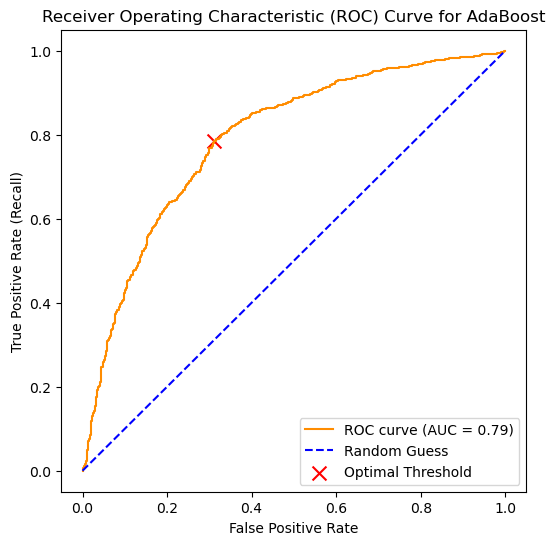

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for AdaBoost
y_scores_ada = ada_boost.predict_proba(X_train_t_val)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_train_t_val, y_scores_ada)

# Compute AUC score
auc_score = roc_auc_score(Y_train_t_val, y_scores_ada)

# Find the optimal threshold (closest to perfect recall & precision)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Get coordinates of the optimal point
optimal_fpr = fpr[optimal_idx]
optimal_tpr = tpr[optimal_idx]

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='blue', label="Random Guess")  # Baseline
plt.scatter(optimal_fpr, optimal_tpr, color='red', marker='x', s=100, label="Optimal Threshold")  # Add 'X' marker

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve for AdaBoost")
plt.legend()
plt.show()


In [168]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# 读取训练数据 (使用你原始的训练数据集)
df = pd.read_csv('heloc_dataset_v1.csv')

# 预处理数据: 将 "RiskPerformance" 列转换为数值
df['RiskPerformance'] = df['RiskPerformance'].map({'Bad': 0, 'Good': 1})

# 选择特征和标签
X = df.drop(columns=['RiskPerformance'])  # 你的特征数据
y = df['RiskPerformance']                 # 你的标签数据

# 训练模型
model = RandomForestClassifier()
model.fit(X, y)

# 保存模型为 model.pkl
joblib.dump(model, 'model.pkl')

print("Model re-trained and saved as model.pkl")



Model re-trained and saved as model.pkl
